In [38]:
from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import Image, display

In [31]:
# Step 1: Define agent functions (without dummy data)
def soil_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Soil agent processed"})
    return {"messages": state.messages, "data": state.data}

def water_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Water agent processed"})
    return {"messages": state.messages, "data": state.data}

def weather_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Weather agent processed"})
    return {"messages": state.messages, "data": state.data}

def stage_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Stage agent processed"})
    return {"messages": state.messages, "data": state.data}

def merge_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Merge agent processed"})
    return {"messages": state.messages, "data": state.data}

def validation_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Validation agent processed"})
    return {"messages": state.messages, "data": state.data}


In [41]:
# Step 2: Create StateGraph
graph = StateGraph(MessagesState)

In [42]:
# Add nodes
graph.add_node("soil_agent", action=soil_agent)
graph.add_node("water_agent", action=water_agent)
graph.add_node("weather_agent", action=weather_agent)
graph.add_node("stage_agent", action=stage_agent)
graph.add_node("merge_agent", action=merge_agent)
graph.add_node("validation_agent", action=validation_agent)

In [43]:
# Step 3: Define the parallel workflow
graph.add_edge(START, "soil_agent")
graph.add_edge(START, "water_agent")
graph.add_edge(START, "weather_agent")

# After Soil, Water, and Weather, all of them feed into Stage
graph.add_edge("soil_agent", "stage_agent")
graph.add_edge("water_agent", "stage_agent")
graph.add_edge("weather_agent", "stage_agent")

# From Stage, the result moves to Merge and Validation
graph.add_edge("stage_agent", "merge_agent")
graph.add_edge("merge_agent", "validation_agent")

# Merge and Validation should both lead to END
graph.add_edge("merge_agent", END)
graph.add_edge("validation_agent", END)

In [ ]:
# # Connecting validation agent to all other agents
# graph.add_edge("soil_agent", "validation_agent")
# graph.add_edge("water_agent", "validation_agent")
# # graph.add_edge("weather_agent", "validation_agent")
# graph.add_edge("stage_agent", "validation_agent")
# graph.add_edge("merge_agent", "validation_agent")

# graph.add_edge("validation_agent", END)

In [44]:
# Compile the graph
graph = graph.compile()

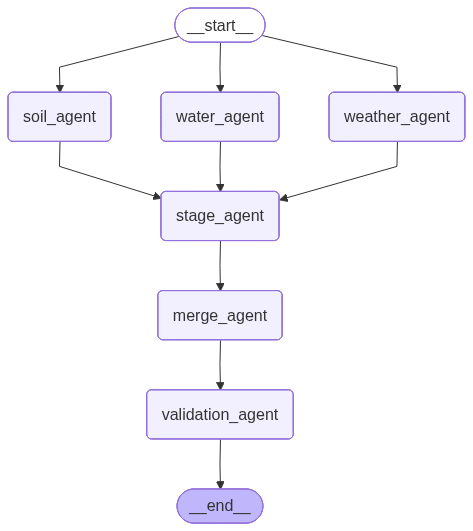

In [45]:
display(Image(graph.get_graph().draw_mermaid_png()))

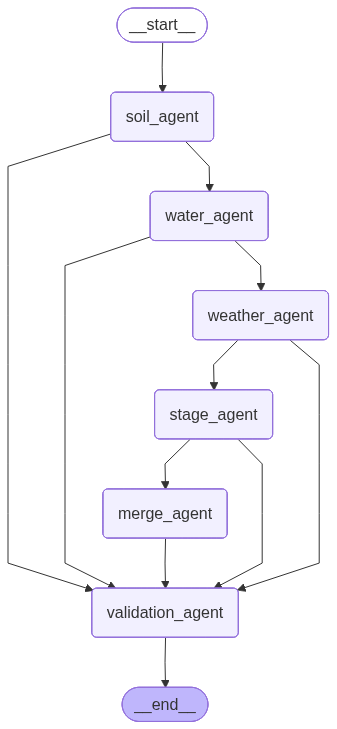

In [26]:
# Visualize the flowchart (this will show the diagram with all connections)
display(Image(graph.get_graph().draw_mermaid_png()))

In [27]:
# Step 4: Invoke the workflow
input_state = MessagesState(messages=[{"role": "user", "content": "Start crop report"}])

result = graph.invoke(input_state)

AttributeError: 'dict' object has no attribute 'messages'